In [1]:
!pip install keras

You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist # dataset
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# we'll be using random later
# in order to get repeatable "random" data we seed it accordingly
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # turns the images into matrices

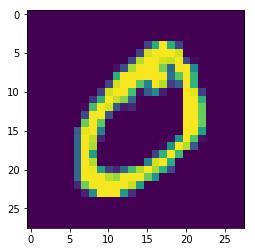

In [5]:
test_image = X_train[1]
plt.imshow(X_train[1])

In [6]:
print(len(X_train[0][0]))

28


In [7]:
print(len(X_train[0][1]))

28


In [8]:
# print(len(X_train))
# print(X_train)

In [9]:
# X_train[0]

In [10]:
print(len(y_train))
print(y_train) # seems like y are the labels (the actual numbers)

60000
[5 0 4 ... 5 6 8]


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [12]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "Not all images have the same size" # actually could also use a for loop but this shorthand is so much shorter
assert(X_test.shape[1:] == (28,28)), "Not all images have the same size"

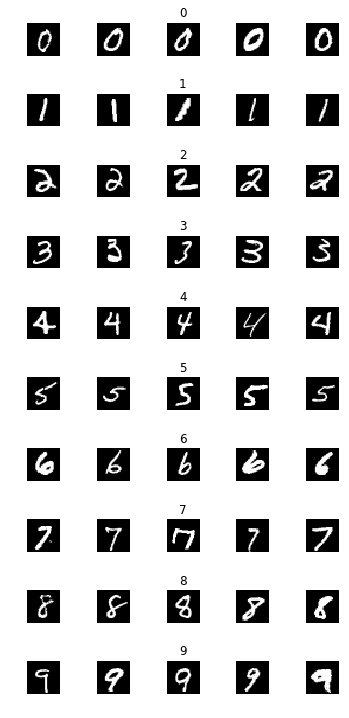

In [13]:
num_of_samples = []

cols = 5
num_classes = 10

# create some grids
# if you comment the code below this and run then you will see the empty grids that subpots created
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout() # positions and prevents overlap

# add the pics into the grids
for i in range(cols):
    for j in range(num_classes):
        # print(i, " i ", j, " j")
        
        # gets all the ones that is true aka the image with the number j
        x_selected = X_train[y_train == j]
        # print(y_train == j)
        
        # a bunch of images of the number j
        # for some reason plt.imshow only prints the last one (perhaps it changed from 1 - 9)
        # plt.imshow(x_selected[4])
                
        # plop it into the grid (subplot)
        # the random is just choosing a random from 0, 1, so on...
        # (2) is the color - we grayscale all the pics
        axs[j][i].imshow(
            x_selected[random.randint(0, len(x_selected - 1)), :, :],
            cmap=plt.get_cmap("gray")
        )
        
        # turn off the axis for each pic
        axs[j][i].axis("off")
        
        # add a title to the third item
        if i == 2:
            axs[j][i].set_title(str(j))
            
            # counts number of images per num (0, 1, 2) organized by index = num
            num_of_samples.append(len(x_selected))

In [14]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


In [15]:
# print(y_train)

In [16]:
# print(y_test)

In [17]:
# one hot encode
# turns categorical data (dog, cat) into numbers
# see: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
# (2) is just the number of categories (in this case there are 10 - 0 to 9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# not much happens to these two
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [18]:
# plus some normalization to between 0/1 or -1/1
X_train = X_train/255
X_test = X_test/255

# print(X_test[0])

In [19]:
# flatten each image instead of it being a matrix

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

# print(X_train[0])

In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # jsut a gradient descrent optimizer aka finding the lowest point
    # what is teh lowest point for? see thinkful probs
    # see: https://arxiv.org/abs/1412.6980v8
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [21]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.1, 
    epochs = 10, 
    batch_size = 200,
    verbose = 1,
    shuffle = 1
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.5441 - acc: 0.8293 - val_loss: 0.2770 - val_acc: 0.9222
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3056 - acc: 0.9111 - val_loss: 0.2385 - val_acc: 0.9305
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2781 - acc: 0.9189 - val_loss: 0.2266 - val_acc: 0.9347
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2629 - acc: 0.9222 - val_loss: 0.2182 - val_acc: 0.9353
Epoch 5/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2517 - acc: 0.9264 - val_loss: 0.2256 - val_acc: 0.9352
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2489 - acc: 0.9272 - val_loss: 0.2104 - val_acc: 0.9395
Epoch 7/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.2394 - acc: 0.9299 - val_loss: 0.1994 - val_acc:

Text(0.5,0,'epoch')

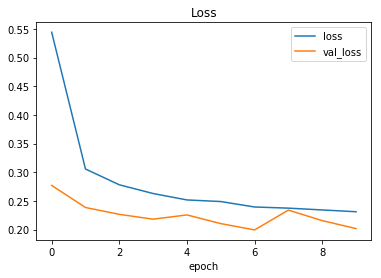

In [23]:
# just showing the loss compared to the epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

# as you can see the validation error (loss) increases as you have more epochs
# aka it is overfitting to the training so it performs badly on the validation

Text(0.5,0,'epoch')

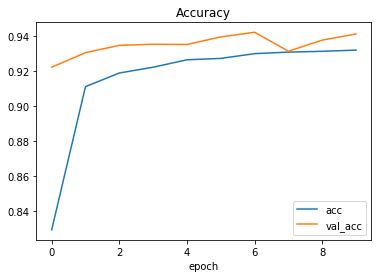

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2423372913375497
Test accuracy: 0.931


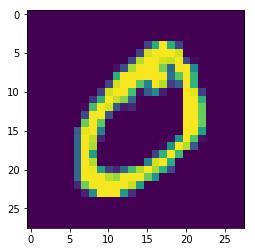

In [26]:
# testing a prediction
plt.imshow(test_image)

In [27]:
'''
# continuation
test_image = test_image.flatten()

# doing the flattening
# X_train = X_train.reshape(X_train.shape[0], num_pixels)
test_arr = np.array(test_image)
test_arr = np.array(test_arr)

test_arr = test_arr.reshape(test_arr.shape[0], num_pixels)
print(test_arr.shape)

# print(test_arr)

prediction = model.predict(test_arr)
# print(prediction)
'''

test_image_1 = test_image.flatten()
test_image_2 = test_image.flatten()

test_arr = np.array([test_image_1, test_image_2])
test_arr = test_arr.reshape(test_arr.shape[0], num_pixels)

prediction = model.predict(test_arr)
print(prediction)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


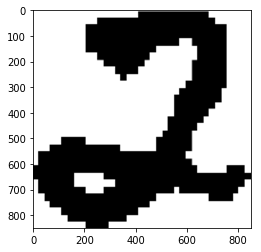

In [28]:
!pip install requests
!pip install Image # not sure if this install is needed

import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
# (2) tells the function not to first download the entire image in 1 go
response = requests.get(url, stream=True)
response

# parses the image into something useable
img = Image.open(response.raw)
plt.imshow(img)

You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
predicted digit: [3]


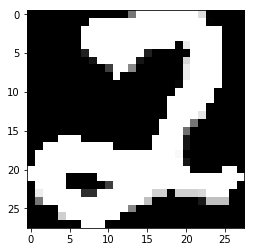

In [29]:
# now do some data wrangling to get it to similar to dataset

!pip install opencv-python
!pip install opencv-python-headless

# !apt update && apt install -y libsm6 libxext6
# apt-get install libsm6 libxrender1 libfontconfig1

import cv2

# print(img)
# turn the image parsed using PIL to a numpy array
img = np.asarray(img)
# print(img.shape)
# the image is 840 x 840 
# our model uses 28,28 and gray and the num is white and background is black
# so resize it smaller (1), gray (2), and inverse the colors (3)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

# how to show a gray image as gray
plt.imshow(img, cmap=plt.get_cmap('gray'))

# normalize the pic and flatten
img = img/255
img = img.reshape(1, 784)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))
# not too accurate lol - need to start using convolutions